## Data cleaning practice assignment


---
The data set chosen is a tree data set. It contains information about species, diameter and health of trees in New York city.


In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = "/content/drive/MyDrive/dm_data/Street_Tree_Census_-_Tree_Data.csv"
trees_data = pd.read_csv(data_path)

Understand the overall picture of the data set

In [4]:
trees_data.shape

(683788, 45)

In [5]:
trees_data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [6]:
trees_data.head(5)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


The trees dataset has 68k rows and 45 columns. This is a huge data set and requires a lot of data cleaning

---
Filter out irrelevant columns


In [7]:
# Remove columns which are unnecessary for tree health analysis across New York
trees_data_sub = trees_data[['tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_common', 'steward',
       'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
trees_data_sub.head(5)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,red maple,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,pin oak,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,honeylocust,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,American linden,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [8]:
trees_data_sub.shape

(683788, 19)

In [9]:
# check for data types of subset columns
trees_data_sub.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_common    object
steward       object
sidewalk      object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
dtype: object

In [10]:
# Statistical summary of numerical values in the data set
trees_data_sub.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


Remove null values

In [11]:
trees_data_sub.isnull().any()

tree_id       False
tree_dbh      False
stump_diam    False
curb_loc      False
status        False
health         True
spc_common     True
steward        True
sidewalk       True
problems       True
root_stone    False
root_grate    False
root_other    False
trunk_wire    False
trnk_light    False
trnk_other    False
brch_light    False
brch_shoe     False
brch_other    False
dtype: bool

In [12]:
# check for columns with total sum ofnull values
trees_data_sub.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_common    31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

Only columns health, spc_common_steward, sidewalk, problems have null values

In [13]:
# Remove trees that are not alive or dead
dead_trees=trees_data_sub[trees_data_sub['status']=='Dead']
dead_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


Most of the null values are around the dead trees. So we could eliminate these rows in the data set.

In [14]:
trees_data_sub = trees_data_sub[trees_data_sub['status']!= 'Dead']
trees_data_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,red maple,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,pin oak,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,honeylocust,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,American linden,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,pin oak,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Kentucky yellowwood,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,red maple,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,red maple,None,NoDamage,None,No,No,No,No,No,No,No,No,No


Since the data set is huge we could remove null value rows in the data set for more cleaner and manageable data. The columns to be cleaned are health,  spc_common, steward, sidewalk, and problems


In [15]:
trees_data_sub = trees_data_sub[trees_data_sub['health']!= 'None']
trees_data_sub = trees_data_sub[trees_data_sub['spc_common']!= 'None']
trees_data_sub = trees_data_sub[trees_data_sub['steward']!= 'None']
trees_data_sub = trees_data_sub[trees_data_sub['sidewalk']!= 'None']
trees_data_sub = trees_data_sub[trees_data_sub['problems']!= 'None']
trees_data_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
13,189465,22,0,OnCurb,Alive,Good,London planetree,3or4,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
14,192998,30,0,OnCurb,Alive,Fair,London planetree,1or2,Damage,"Stones,BranchOther",Yes,No,No,No,No,No,No,No,Yes
18,187311,14,0,OnCurb,Alive,Fair,honeylocust,1or2,NoDamage,"TrunkLights,BranchLights",No,No,No,No,Yes,No,Yes,No,No
19,208201,10,0,OnCurb,Alive,Good,ginkgo,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
21,193310,14,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,"RootOther,TrunkOther,BranchOther",No,No,Yes,No,No,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683747,200335,11,0,OnCurb,Alive,Good,ginkgo,1or2,Damage,MetalGrates,No,Yes,No,No,No,No,No,No,No
683748,195289,20,0,OnCurb,Alive,Good,London planetree,1or2,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
683754,189588,6,0,OnCurb,Alive,Good,ginkgo,1or2,Damage,"Stones,RootOther",Yes,No,Yes,No,No,No,No,No,No
683755,189595,20,0,OnCurb,Alive,Good,ginkgo,1or2,Damage,Stones,Yes,No,No,No,No,No,No,No,No


The rows are droppend down to 49k

Dealing with outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ce2964210>,
      dtype=object)

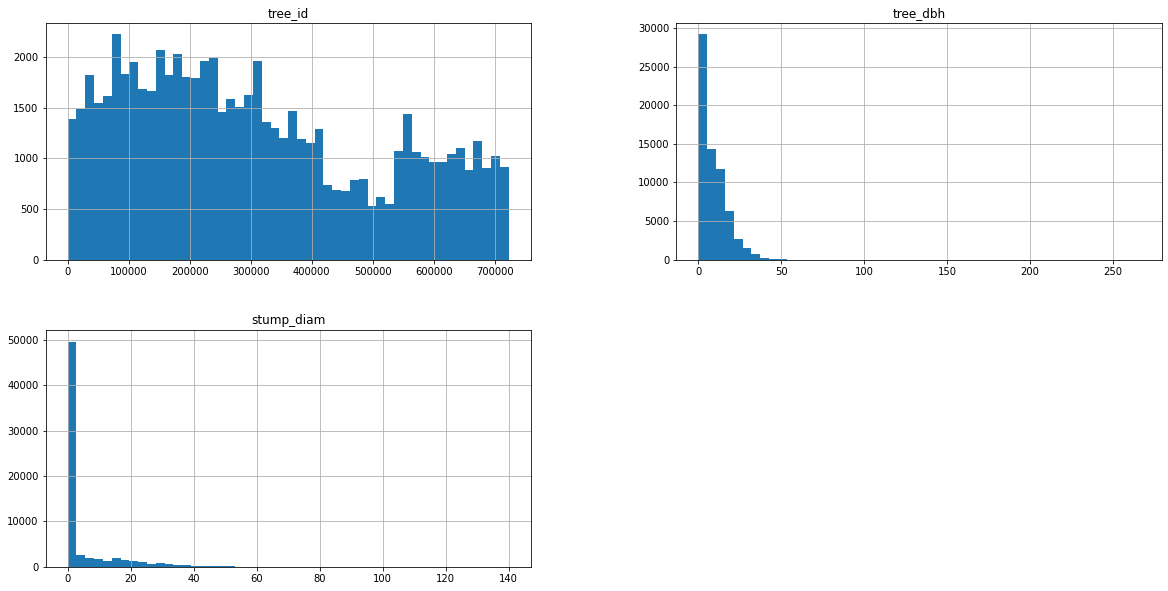

In [16]:
trees_data_sub.hist(bins=50, figsize =(20,10))

From the above histograms, tree diameter and tree stump diameter has outliers with values concentrated at 0 to 50 and 0 to 1 respectively. The remaining values are outliers which could be an anomoly.

Identify the threshold for both the characteristics to eliminate outliers

In [17]:
tree_diameter = trees_data_sub[trees_data_sub['tree_dbh']>40]

In [18]:
tree_stump = trees_data_sub[trees_data_sub['stump_diam']>50]

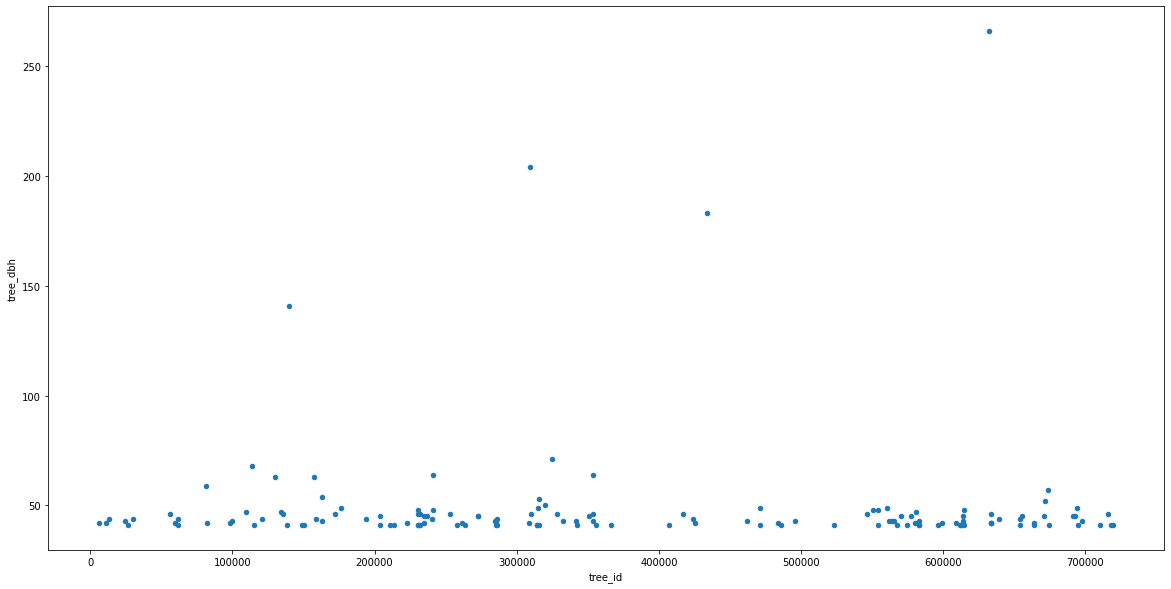

In [19]:
tree_diameter[['tree_id','tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh',figsize=(20,10))

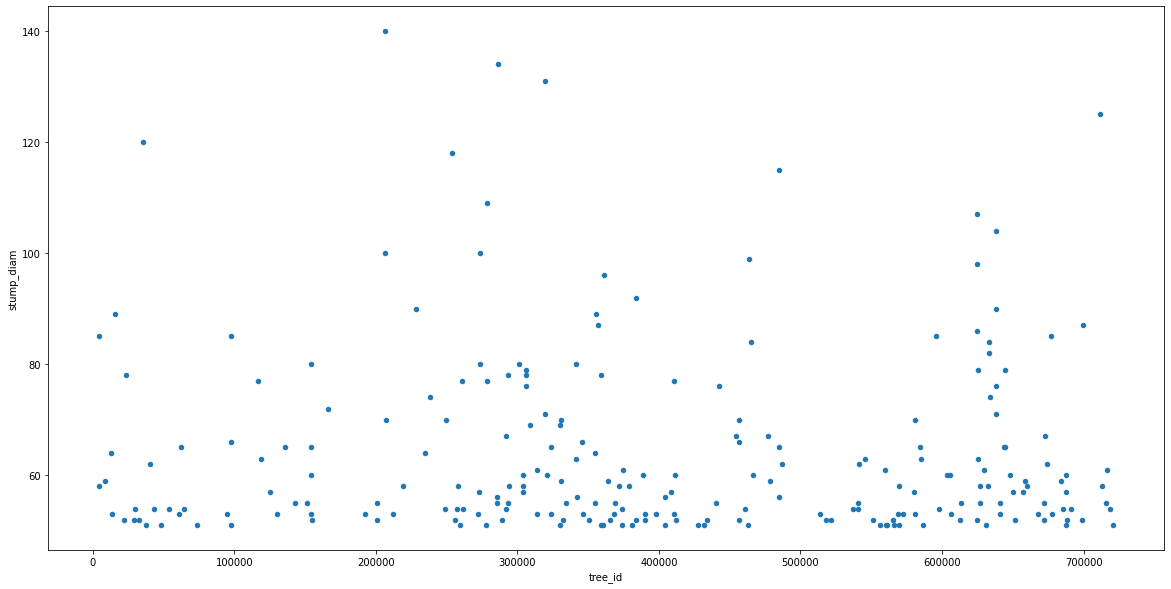

In [20]:
tree_stump[['tree_id','stump_diam']].plot(kind='scatter', x='tree_id', y='stump_diam',figsize=(20,10))

From the above scatter plots, we could consider the threshold for tree diameter to be 70 and stump diameter to be 60. 


Stumps are trees that are cut so removing all stumps data

In [21]:
trees_data_sub = trees_data_sub[trees_data_sub['status']!= 'Stump']
trees_data_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
13,189465,22,0,OnCurb,Alive,Good,London planetree,3or4,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
14,192998,30,0,OnCurb,Alive,Fair,London planetree,1or2,Damage,"Stones,BranchOther",Yes,No,No,No,No,No,No,No,Yes
18,187311,14,0,OnCurb,Alive,Fair,honeylocust,1or2,NoDamage,"TrunkLights,BranchLights",No,No,No,No,Yes,No,Yes,No,No
19,208201,10,0,OnCurb,Alive,Good,ginkgo,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
21,193310,14,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,"RootOther,TrunkOther,BranchOther",No,No,Yes,No,No,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683747,200335,11,0,OnCurb,Alive,Good,ginkgo,1or2,Damage,MetalGrates,No,Yes,No,No,No,No,No,No,No
683748,195289,20,0,OnCurb,Alive,Good,London planetree,1or2,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
683754,189588,6,0,OnCurb,Alive,Good,ginkgo,1or2,Damage,"Stones,RootOther",Yes,No,Yes,No,No,No,No,No,No
683755,189595,20,0,OnCurb,Alive,Good,ginkgo,1or2,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [22]:
trees_data_sub['status'].value_counts()

Alive    49122
Name: status, dtype: int64

In [23]:
# since we are dealing with only the alive trees remove the status column
del trees_data_sub['status']
del trees_data_sub['stump_diam']
trees_data_sub

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
13,189465,22,OnCurb,Good,London planetree,3or4,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
14,192998,30,OnCurb,Fair,London planetree,1or2,Damage,"Stones,BranchOther",Yes,No,No,No,No,No,No,No,Yes
18,187311,14,OnCurb,Fair,honeylocust,1or2,NoDamage,"TrunkLights,BranchLights",No,No,No,No,Yes,No,Yes,No,No
19,208201,10,OnCurb,Good,ginkgo,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
21,193310,14,OnCurb,Good,honeylocust,1or2,Damage,"RootOther,TrunkOther,BranchOther",No,No,Yes,No,No,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683747,200335,11,OnCurb,Good,ginkgo,1or2,Damage,MetalGrates,No,Yes,No,No,No,No,No,No,No
683748,195289,20,OnCurb,Good,London planetree,1or2,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
683754,189588,6,OnCurb,Good,ginkgo,1or2,Damage,"Stones,RootOther",Yes,No,Yes,No,No,No,No,No,No
683755,189595,20,OnCurb,Good,ginkgo,1or2,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [29]:
#remove the outliers where tree diameter is above the threshold = 70
threshold = 60
trees_data_sub = trees_data_sub[(trees_data_sub['tree_dbh'] < threshold)]
trees_data_sub

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
13,189465,22,OnCurb,Good,London planetree,3or4,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
14,192998,30,OnCurb,Fair,London planetree,1or2,Damage,"Stones,BranchOther",Yes,No,No,No,No,No,No,No,Yes
18,187311,14,OnCurb,Fair,honeylocust,1or2,NoDamage,"TrunkLights,BranchLights",No,No,No,No,Yes,No,Yes,No,No
19,208201,10,OnCurb,Good,ginkgo,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
21,193310,14,OnCurb,Good,honeylocust,1or2,Damage,"RootOther,TrunkOther,BranchOther",No,No,Yes,No,No,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683747,200335,11,OnCurb,Good,ginkgo,1or2,Damage,MetalGrates,No,Yes,No,No,No,No,No,No,No
683748,195289,20,OnCurb,Good,London planetree,1or2,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No
683754,189588,6,OnCurb,Good,ginkgo,1or2,Damage,"Stones,RootOther",Yes,No,Yes,No,No,No,No,No,No
683755,189595,20,OnCurb,Good,ginkgo,1or2,Damage,Stones,Yes,No,No,No,No,No,No,No,No


This data set could be later explored to categorize the trees based on their health depending on various factors like steward, sidewalk, diameter